# K-means 군집

In [4]:
# 필요한 패키지 설치

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv("datasets/Mall_Customers.csv")

# 데이터 샘플 확인
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\LG\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


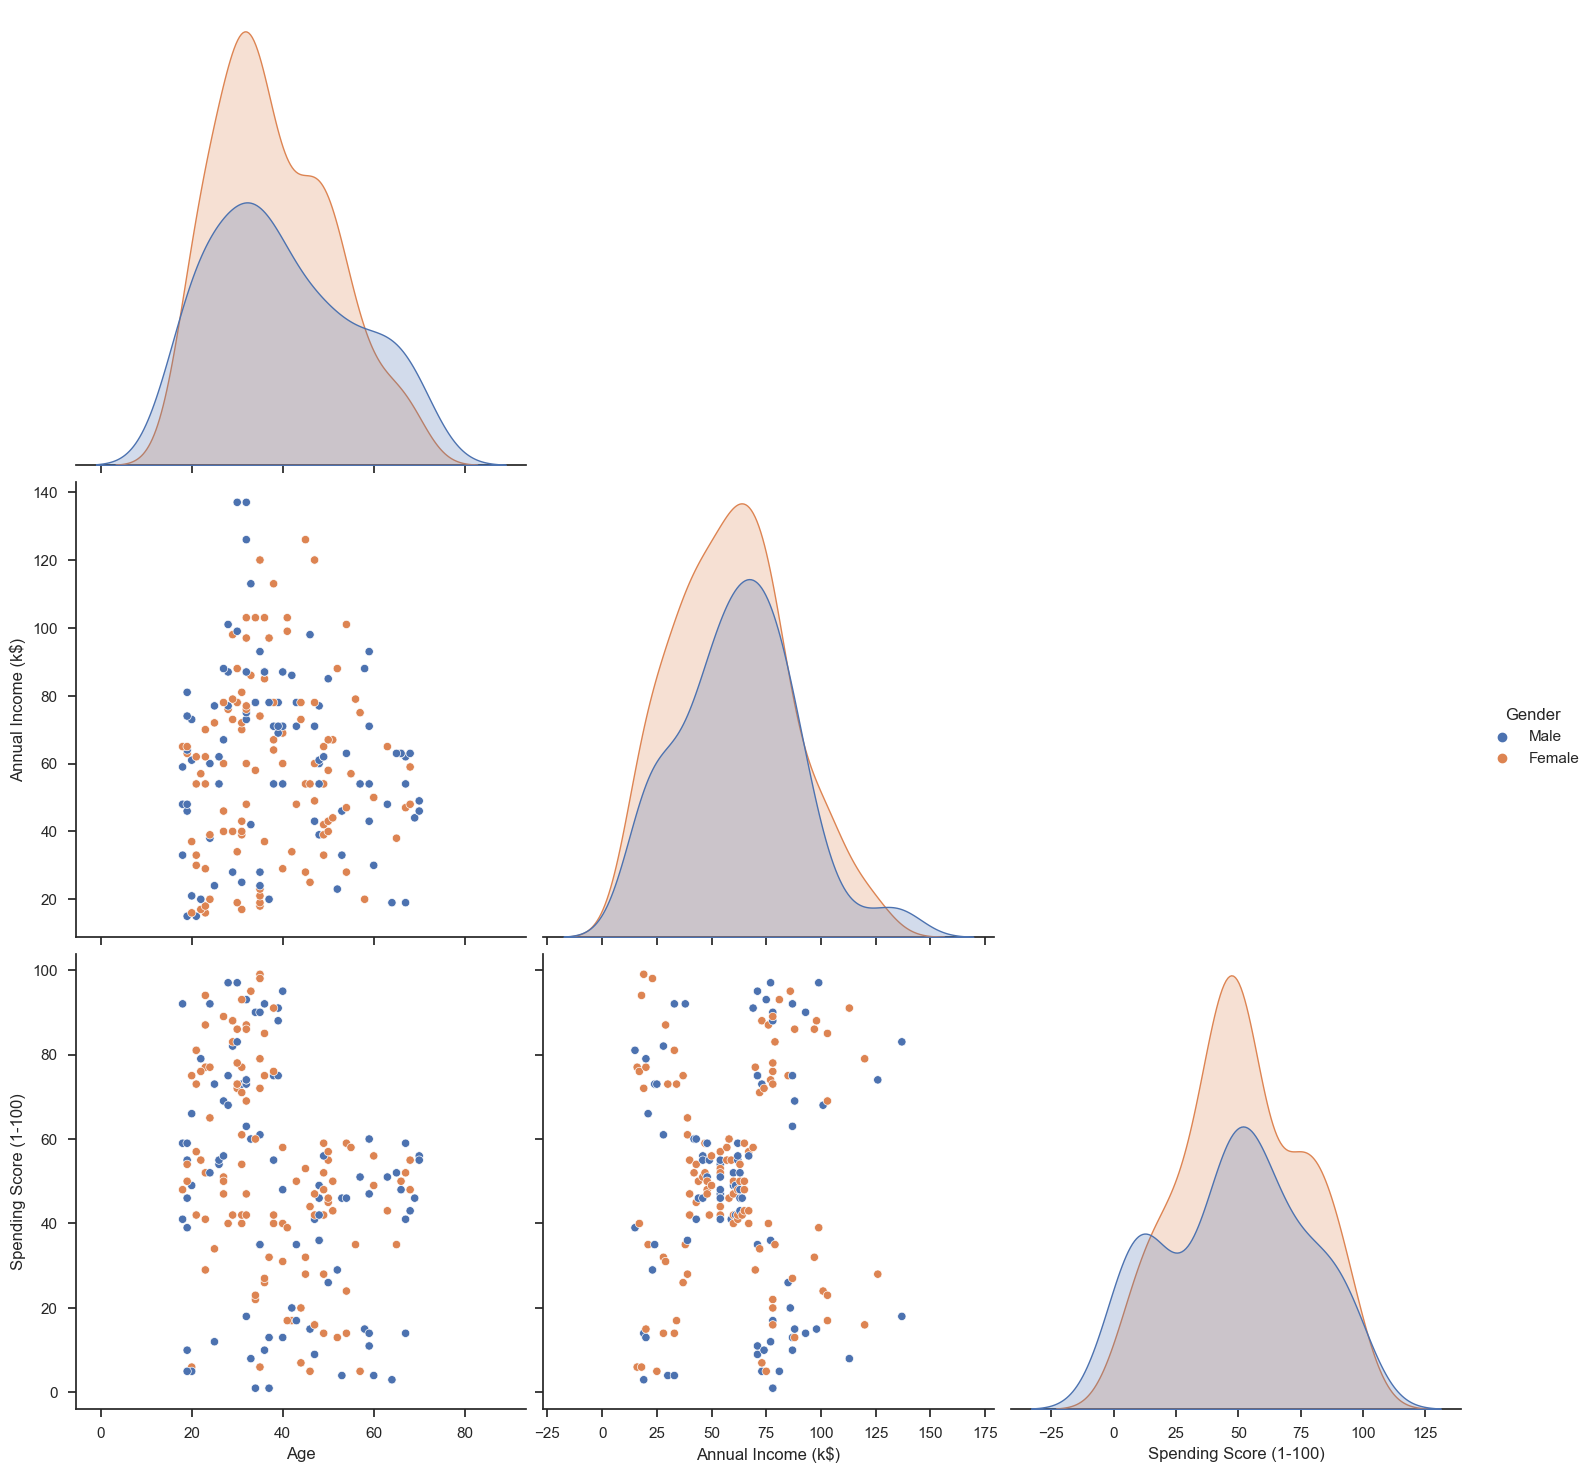

In [6]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop('CustomerID', axis=1)

sns.set(font_scale=1) 
sns.set_style('ticks') 
sns.pairplot(df1, 
             diag_kind='kde', # 상관계수가 1이면 분포로 표시
             hue = 'Gender',
             corner=True,
             height = 5
            )
plot_kws={"s": 100}

plt.show()

In [7]:
# 데이터 스케일 정규화
# Means는 각 군집의 중심을 뜻하며, 관측치와 중심점 간의 거리를 사용하기 때문에 데이터 표준화나 정규화를 꼭 해야 한다. 

# Gender변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ['Gender'],drop_first=True)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [8]:
# k-means 클러스터링 모델 생성

kmeans_model_1 = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=37
)

kmeans_model_1.fit(df_minmax)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)

# 반복 횟수
print(kmeans_model_1.n_iter_)

29.552857611943857
[[1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]
 [3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]]
10


## 적절한 K의 수 찾기

1. 비지니스 도메인 지식을 활용

2. 엘보우 기법 : 군집 내 중심점과 관측치 간 거리 합이 급감하는 구간의 K개수 = 잘 묶였다는 거

3. 실루엣 계수 : 군집 안의 관측치귿링 다른 군집과 비교해서 얼마나 비슷한지 나타내는 수치

<Axes: >

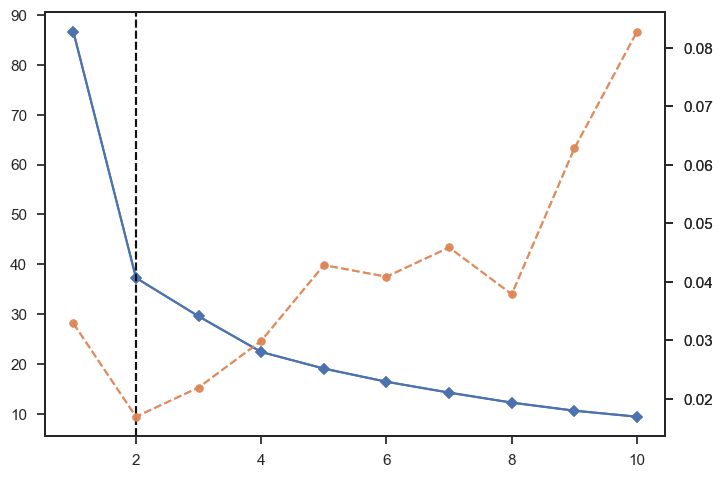

In [9]:
# 엘보우 차트 시각화

Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw() 

C:\Users\LG\AppData\Local\Temp\ipykernel_7256\1551483173.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


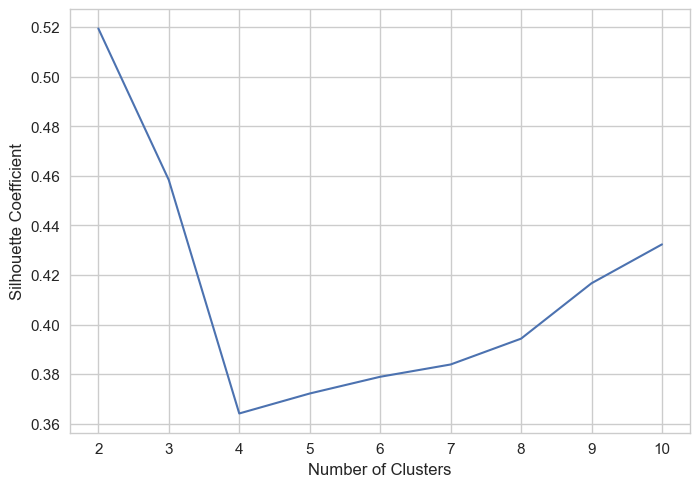

In [10]:
# 실루엣 계수 시각화 1

# k-means 모델 설정
kmeans_model_2 = {
       "init": "k-means++",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 37,
        }

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2, 11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)
    
plt.style.use('seaborn-whitegrid')
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

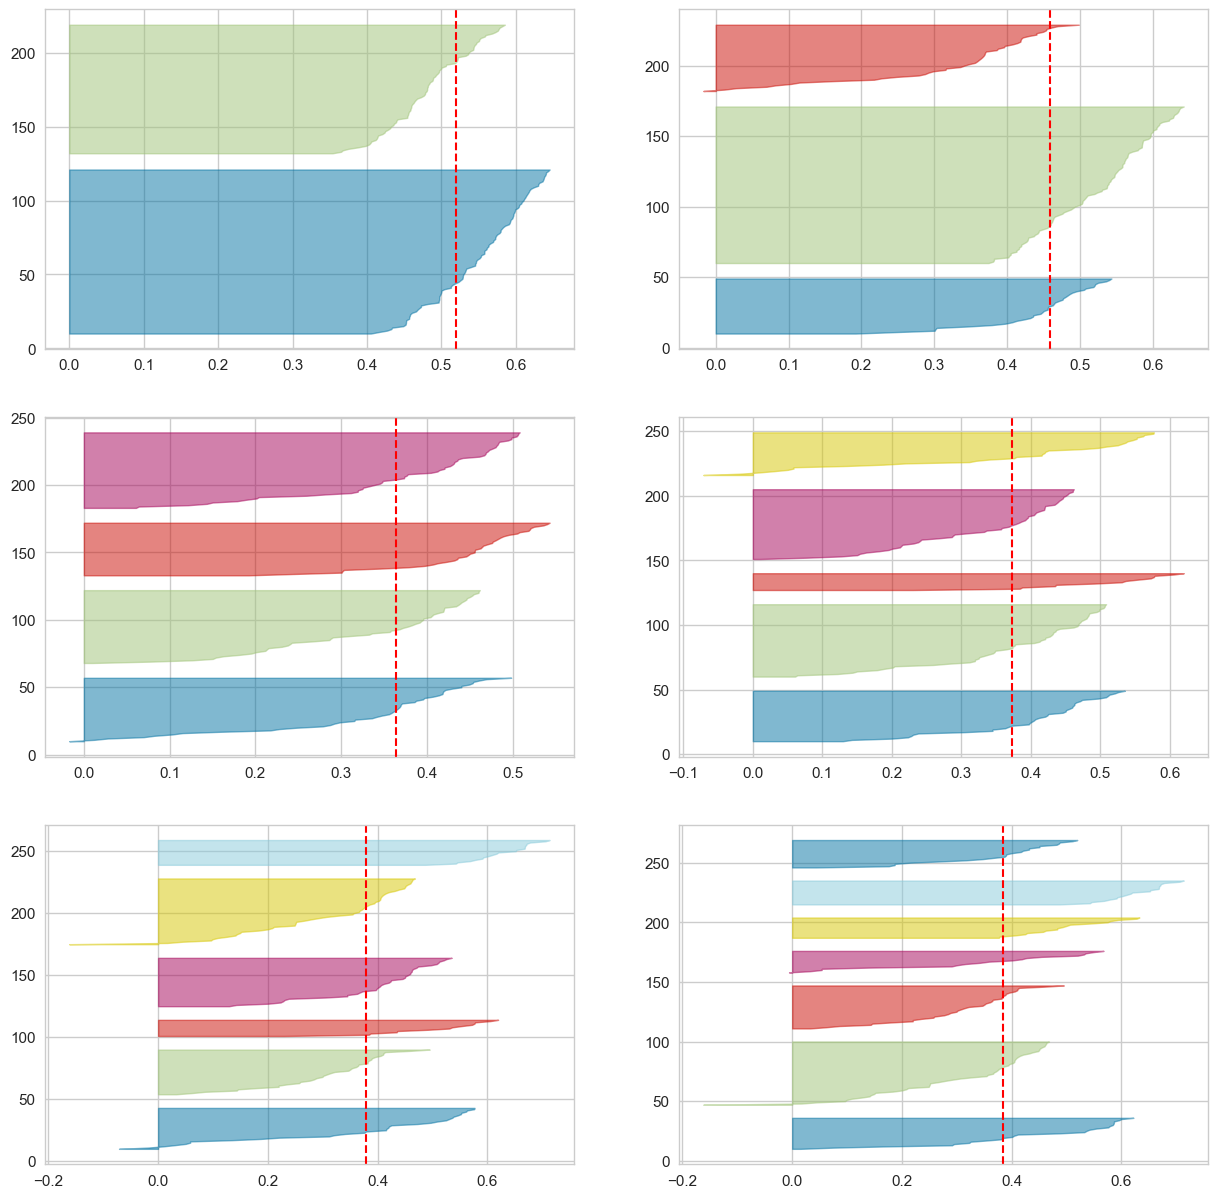

In [11]:
# 실루엣 계수 시각화 2

fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:

# k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i, 
                            init="k-means++", 
                            n_init=10, 
                            max_iter=300, 
                            random_state=37)
    q, mod = divmod(i, 2)

# 실루엣 계수 시각화    
    visualizer = SilhouetteVisualizer(kmeans_model_3, 
                                      colors="yellowbrick", 
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

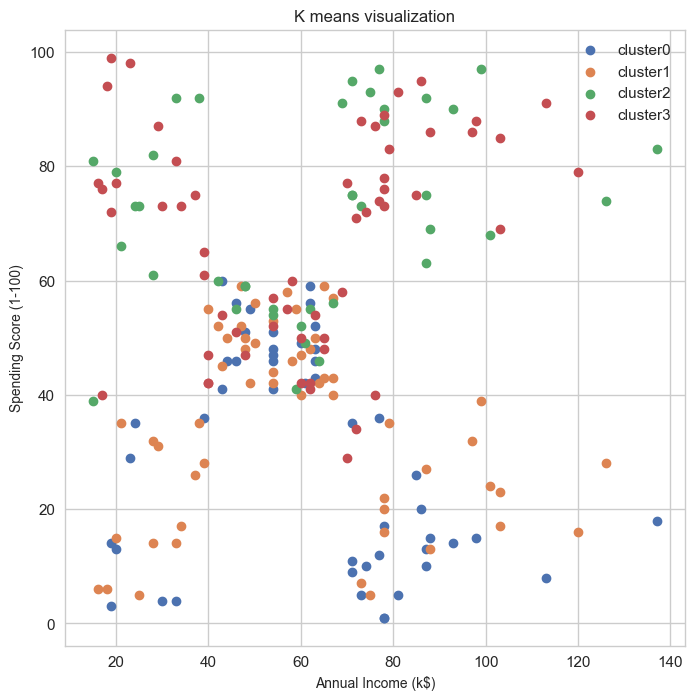

In [12]:
# k-means 클러스터 시각화

# k-means 모델 설정
kmeans_model_4 = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=37)

# 군집 번호 결합 
df2['cluster1'] = kmeans_model_4.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i, 
                        'Annual Income (k$)'], 
                df2.loc[df2['cluster1'] == i, 
                        'Spending Score (1-100)'], 
                label = 'cluster'+str(i))

plt.legend()
plt.title('K means visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

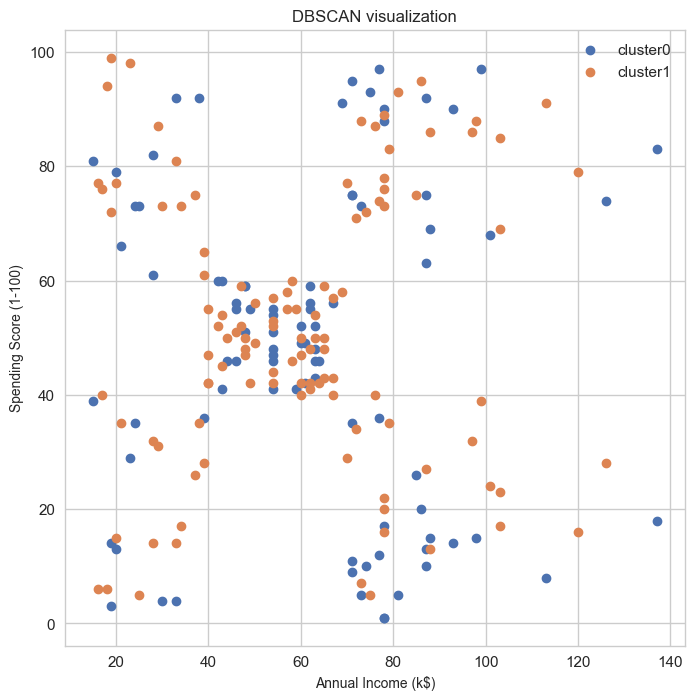

In [13]:
# DBSCAN 모델 생성 및 시각화

# DBSCAN 모델 설정
DBSCAN_model = DBSCAN(eps=0.7, min_samples=5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
DBSCAN_model.fit(df_minmax)
df2['cluster2'] = DBSCAN_model.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize = (8, 8))
for i in range(0, df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i, 
                        'Annual Income (k$)'], 
                df2.loc[df2['cluster2'] == i, 
                        'Spending Score (1-100)'], 
                    label = 'cluster'+str(i))

plt.legend()
plt.title('DBSCAN visualization', size = 12)
plt.xlabel('Annual Income (k$)', size = 10)
plt.ylabel('Spending Score (1-100)', size = 10)
plt.show()

In [14]:
# k-means 군집 별 특성 확인

df_kmeans = df2.groupby(['cluster1']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'
                                          }).reset_index()

df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,49.437500,62.416667,29.208333,1.0,48
1,1,48.109091,58.818182,34.781818,0.0,55
2,2,28.250000,62.000000,71.675000,1.0,40
3,3,28.438596,59.666667,67.684211,0.0,57


In [15]:
# DBSCAN 군집 별 특성 확인

df_DBSCAN = df2.groupby(['cluster2']).agg({'Age':'mean',
                                          'Annual Income (k$)':'mean',
                                          'Spending Score (1-100)':'mean',
                                          'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt'] = df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112
